In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [8]:
df_all = pd.read_csv('fanfic_regression_data_curated_autocat.tsv', sep = '\t')

In [9]:
len(df_all)

697744

In [10]:
df_all['ChapterIndex'].fillna(0, inplace=True)

In [11]:
df_all.head(2)

,Bookmarks,ChapterIndex,Chapters,Comments,Hits,Kudos,Term_novelty,Topic_novelty,fandom_category,Freq_relationship,Category_cat,ArchiveWarnings_cat,author_fic_cnt,Rating_cat,fandom_cat,History
0,0.666667,1.0,3,0,106.666667,2.666667,0.778655,0.599456,harry_potter,0,153,122,6,1,9,5136.0
1,0.000000,0.0,1,0,25.000000,1.000000,0.713975,0.605999,harry_potter,0,153,122,17,5,9,5589.0


### Logistic

In [12]:
df_all['Intercept'] = 1.0

In [13]:
df_all['kudos_binary'] = df_all['Kudos'].apply(lambda x: 1 if x != 0.0 else 0)

In [14]:
df_all['kudos_binary'].value_counts()

1    685486
0     12258
Name: kudos_binary, dtype: int64

In [15]:
df_all = df_all.replace([np.inf, -np.inf], np.nan)
df_all = df_all.dropna(how = 'any')

In [16]:
len(df_all)

697707

In [17]:
df_all.columns.values

array(['Bookmarks', 'ChapterIndex', 'Chapters', 'Comments', 'Hits',
       'Kudos', 'Term_novelty', 'Topic_novelty', 'fandom_category',
       'Freq_relationship', 'Category_cat', 'ArchiveWarnings_cat',
       'author_fic_cnt', 'Rating_cat', 'fandom_cat', 'History',
       'Intercept', 'kudos_binary'], dtype=object)

In [36]:
logit_model = sm.Logit(df_all["kudos_binary"], df_all[['Chapters','ChapterIndex',
        'Term_novelty', 'Topic_novelty', \
        'Freq_relationship', 'Category_cat',\
       'ArchiveWarnings_cat', 'author_fic_cnt', 'Rating_cat',\
       'fandom_cat', 'History', 'Intercept']]).fit(method='bfgs')

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:

         Current function value: 0.090886
         Iterations: 35
         Function evaluations: 72
         Gradient evaluations: 63


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [37]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           kudos_binary   No. Observations:               697707
Model:                          Logit   Df Residuals:                   697695
Method:                           MLE   Df Model:                           11
Date:                Wed, 18 Jul 2018   Pseudo R-squ.:                -0.02788
Time:                        16:01:12   Log-Likelihood:                -63412.
converged:                      False   LL-Null:                       -61692.
                                        LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Chapters                0.0342      0.002     17.761      0.000       0.030       0.038
ChapterIndex            0.1168      0.004     26.738      0.000       0.108       0.125
Term_novelty            0.0574      0.032      1.782      0.075      -0.006       0.121
Topic_novelty           0.5577      0.183      3.053      0.002       0.200       0.916
Freq_relationship       1.1716      0.025     47.192      0.000       1.123       1.220
Category_cat           -0.0004   8.47e-05     -4.187      0.000      -0.001      -0.000
ArchiveWarnings_cat     0.0090      0.000     54.725      0.000       0.009       0.009
author_fic_cnt      -7.215e-05   5.36e-06    -13.451      0.000   -8.27e-05   -6.16e-05
Rating_cat              0.1026      0.005     21.572      0.000       0.093       0.112
fandom_cat              0.0489      0.001     34.557      0.000       0.046       0.052
History                 0.0003   1.56e-05     16.083      0.000       0.000       0.000
Intercept               1.0355      0.114      9.079      0.000       0.812       1.259
=======================================================================================
"""

In [38]:
pred = logit_model.predict()

In [39]:
sorted(pred)

[0.7217699255264061,
 0.7448714730463192,
 0.7449834853240801,
 0.7488287889994436,
 0.7491326655677711,
 0.7510729441339191,
 0.7541560234864778,
 0.75719577759643,
 0.7589249581960412,
 0.7595918973162289,
 0.7602388417048581,
 0.7614530890036806,
 0.7652417894620149,
 0.7672429034405766,
 0.7674483848164172,
 0.7674724338855877,
 0.7683002813640167,
 0.7695650254283504,
 0.7703919792388384,
 0.7714755373599285,
 0.7728214676949255,
 0.7733772804481133,
 0.7775254639184105,
 0.7779774453062249,
 0.7798784735862604,
 0.7824003203241554,
 0.7881218171201281,
 0.7888081023592471,
 0.7892546311920939,
 0.7906804878597467,
 0.7918157749148125,
 0.7918408886924463,
 0.791972868206522,
 0.7921921173391492,
 0.7926701728893643,
 0.7933673106053634,
 0.7938013327895906,
 0.7944842551488694,
 0.7946639628543696,
 0.79474916848631,
 0.7948511887933181,
 0.7949805424570389,
 0.7953081060002106,
 0.7955878145188465,
 0.7968278206511821,
 0.7969224921447375,
 0.7975409369099776,
 0.798450566076032

In [40]:
df_all['kudos_nonzero_prob'] = pred

### OLS

In [41]:
df_all_log = df_all.copy()
df_all_log['Kudos'] = np.log(df_all_log['Kudos']+0.001)
df_all_log['Hits'] = np.log(df_all_log['Hits']+0.001)
df_all_log['Comments'] = np.log(df_all_log['Comments']+1)
df_all_log['Bookmarks'] = np.log(df_all_log['Bookmarks']+0.001)
df_all_log = df_all_log.replace([np.inf, -np.inf], np.nan)
df_all_log = df_all_log.dropna(how = 'any')

In [42]:
# s = ''
# for item in df_all.columns.values:
#     s += item + ' + '

In [48]:
model = ols("Kudos ~ Term_novelty + Topic_novelty + Chapters + ChapterIndex +\
        Freq_relationship + Category_cat + \
       ArchiveWarnings_cat + author_fic_cnt + Rating_cat + \
       fandom_cat + History + kudos_nonzero_prob", data = df_all_log).fit()

In [49]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Kudos   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                 1.096e+04
Date:                Wed, 18 Jul 2018   Prob (F-statistic):               0.00
Time:                        16:06:12   Log-Likelihood:            -1.4123e+06
No. Observations:              697707   AIC:                         2.825e+06
Df Residuals:                  697694   BIC:                         2.825e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              29.6237    

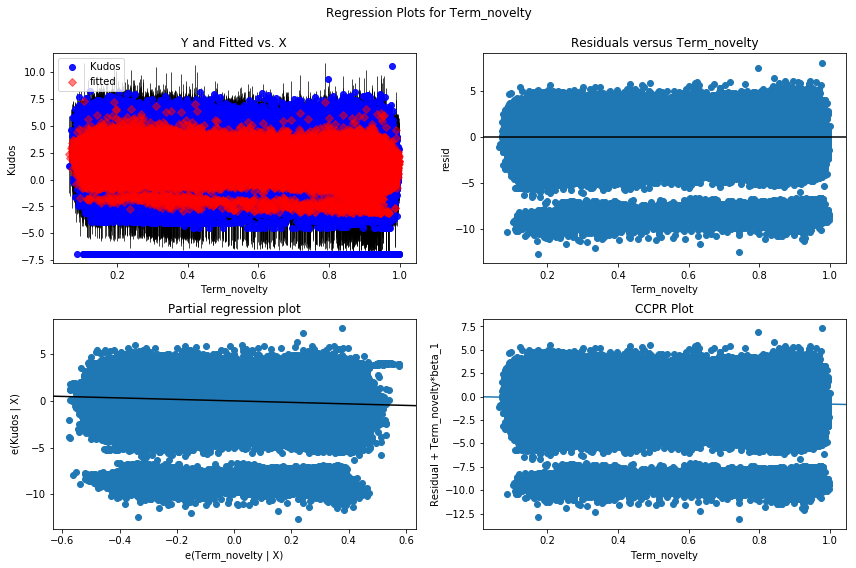

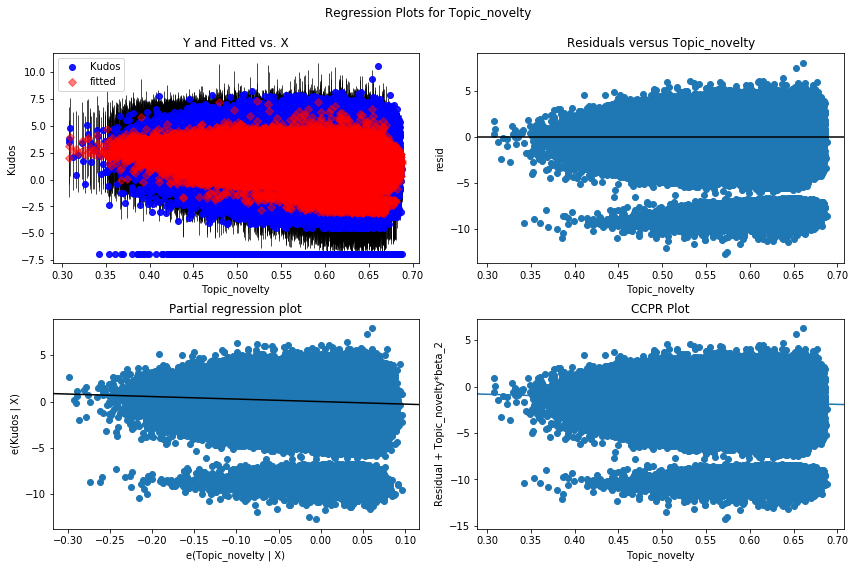

In [47]:
for item in ['Term_novelty', 'Topic_novelty']:
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_regress_exog(model, item, fig=fig)


### Plot coefficients

In [ ]:
ylabels = ['Term novelty', 'Topic novelty', 'Chapters', 'Frequent relationship', 'Category - F/M', '']

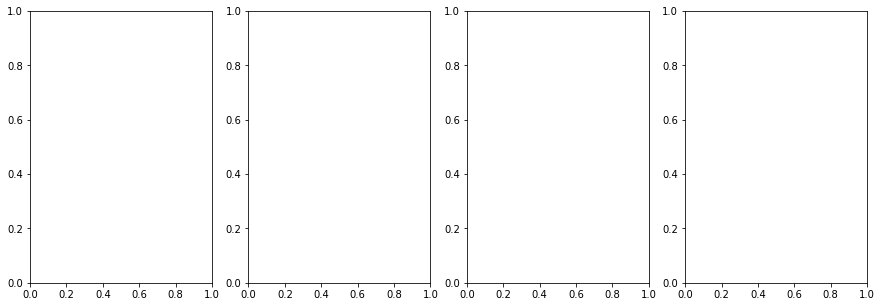

In [20]:
fig, ax = plt.subplots(1,4,figsize = (15,5))
